# TP2 Gabriel García Airline Passenger Satisfaction

¿Qué factores conducen a la satisfacción del cliente de una aerolínea? Source: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction



Este conjunto de datos contiene una encuesta sobre la satisfacción de los pasajeros aéreos.  La información sobre los pasajeros de una compañía aérea es la siguiente:

- Gender: hombre o mujer
- Customer type: cliente habitual o no habitual de la aerolínea
- Age: la edad real del pasajero
- Type of travel: el propósito del vuelo del pasajero (viaje personal o de negocios)
- Class: business, economy, economy plus
- Flight Distance: Distancia de vuelo
- Inflight wifi service: nivel de satisfacción con el servicio wifi a bordo (0: no valorado; 1-5)
- Departure/Arrival time convenient: nivel de satisfacción con la hora de salida/llegada (0: no calificado; 1-5)
- Ease of Online booking: nivel de satisfacción con la reserva en línea (0: no calificado; 1-5)
- Gate location: nivel de satisfacción con la ubicación de la puerta de embarque (0: no calificado; 1-5)
- Food and drink: nivel de satisfacción con la comida y la bebida (0: no valorado; 1-5)
- Online boarding: nivel de satisfacción con el embarque en línea (0: no calificado; 1-5)
- Seat comfort: nivel de satisfacción con el asiento (0: no valorado; 1-5)
- Inflight entertainment: nivel de satisfacción con el entretenimiento a bordo (0: sin valoración; 1-5)
- On-board service: nivel de satisfacción con el servicio a bordo (0: no calificado; 1-5)
- Leg room service: nivel de satisfacción con el servicio de las salas de espera (0: no calificado; 1-5)
- Baggage handling: nivel de satisfacción con el servicio de equipaje (0: no calificado; 1-5)
- Checkin service: nivel de satisfacción con el servicio de facturación (0: no valorado; 1-5)
- Inflight service: nivel de satisfacción con el servicio a bordo (0: sin valoración; 1-5)
- Cleanliness: nivel de satisfacción con la limpieza (0: no calificado; 1-5)
- Departure Delay in Minutes: Retraso de salida en minutos
- Arrival Delay in Minutes: Retraso en la llegada en minutos


Es necesario predecir a cuál de los dos niveles de satisfacción con la aerolínea pertenece el pasajero:

1) Satisfecho
2) Neutral o insatisfecho



In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Pre-modeling

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Modeling

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier


# Metrics

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report

import shap


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Cargamos el dataset y lo unimos, ya que viene dividido

df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')
df_passengers = pd.concat([df_train, df_test], ignore_index=True)

In [3]:
df_passengers.shape

(129880, 25)

In [4]:
# Miramos 5 primeros registros
df_passengers.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Vemos info correspondiente al dataset
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [6]:
df_passengers.isna().sum() 

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

Particularidades observadas en el dataset:

- El dataset contiene 129880 registros y 25 columnas.
- La columna correspondiente al Arrival Delay in Minutes tiene 393 valores faltantes (0.3% del total). Los cuales pueden ser imputados por algún estadístico básico.
- La primera columna Unnamed: 0, parece ser una repetición del índice por lo que se borrará 
- La columna id corresponde a un id único del pasajero, para el problema en cuestión tampoco será utilizada. 
- El dataset contiene tanto variables numéricas como categóricas. Muchas de las categóricas son tratadas como numéricas, así que se procederá a hacer el casteo.

In [7]:
df_passengers.drop(columns = ['Unnamed: 0', 'id'], inplace = True)

In [8]:
# Arreglamos tipos de datos del dataset

num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_passengers_num = df_passengers[num_cols] 
df_passengers_cat = df_passengers.drop(columns = num_cols).astype('category')

df_passengers = pd.concat([df_passengers_num, df_passengers_cat], axis = 1)

In [9]:
# Verificamos el cambio 

df_passengers.dtypes

Age                                     int64
Flight Distance                         int64
Departure Delay in Minutes              int64
Arrival Delay in Minutes              float64
Gender                               category
Customer Type                        category
Type of Travel                       category
Class                                category
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                       

In [10]:
# Ver información adicional de datos
df_passengers.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


De aquí podemos observar que la mediana de edades de los pasajeros es de 40, que tenemos información de vuelos cortos y vuelos extensos, y que muy probablemente el delay tanto en el despegue como en el aterrizaje va a contar con outliers, ya que los valores máximo de estos están muy por encima del valor del percentile 75 de los datos. 

In [11]:
df_passengers.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73452


## EDA

### Variables numéricas

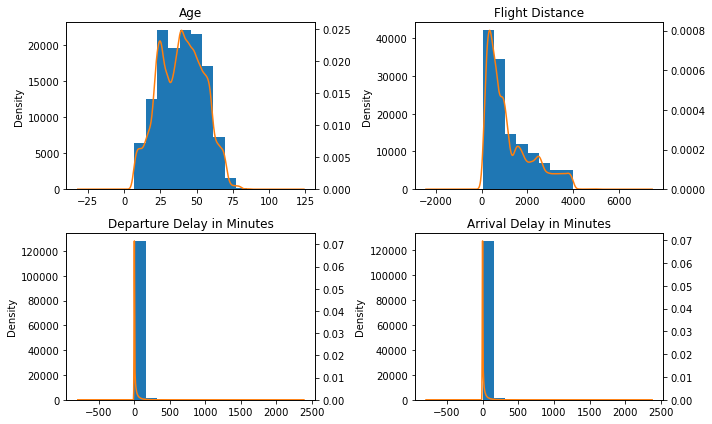

In [12]:
# Grafica de la distribución de cada variable numérica junto con su PDF aproximada
k = len(df_passengers_num.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df_passengers_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

La mayoría de variables numéricas parece tener un claro sesgo positivo. 

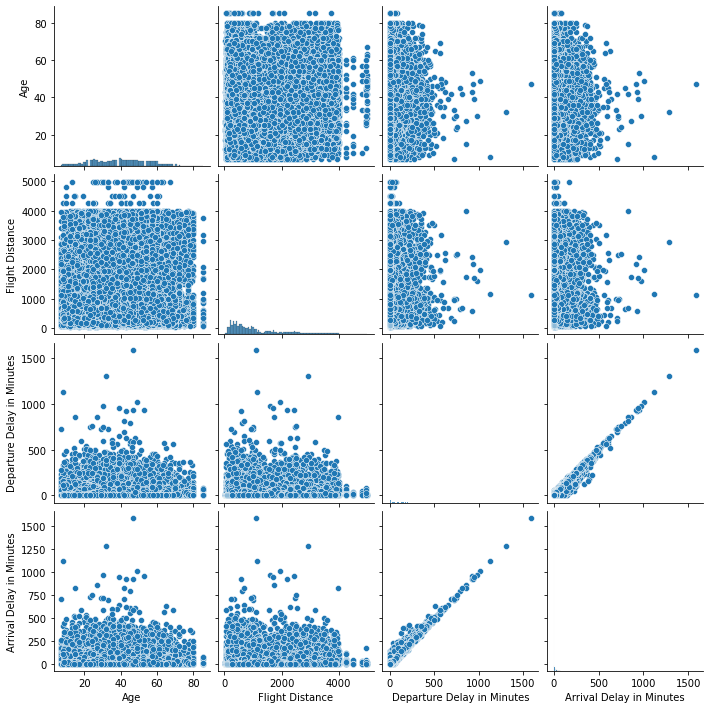

In [13]:
sns.pairplot(df_passengers_num)

Parece haber una altísima correlación entre los delays de despegue y aterrizaje

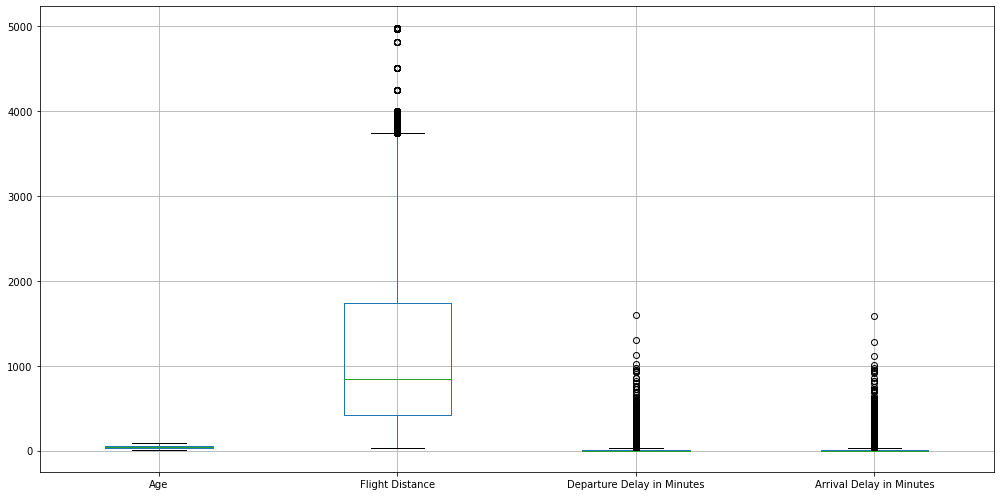

In [14]:
fig = df_passengers_num.boxplot(figsize=(14,7))
plt.tight_layout()
plt.show()

Tal y como se había sospechado inicialmente, las variables del delay al despegue y al aterrizaje cuentan con gran número de outliers. 

#### Análisis bivariado con variable de salida

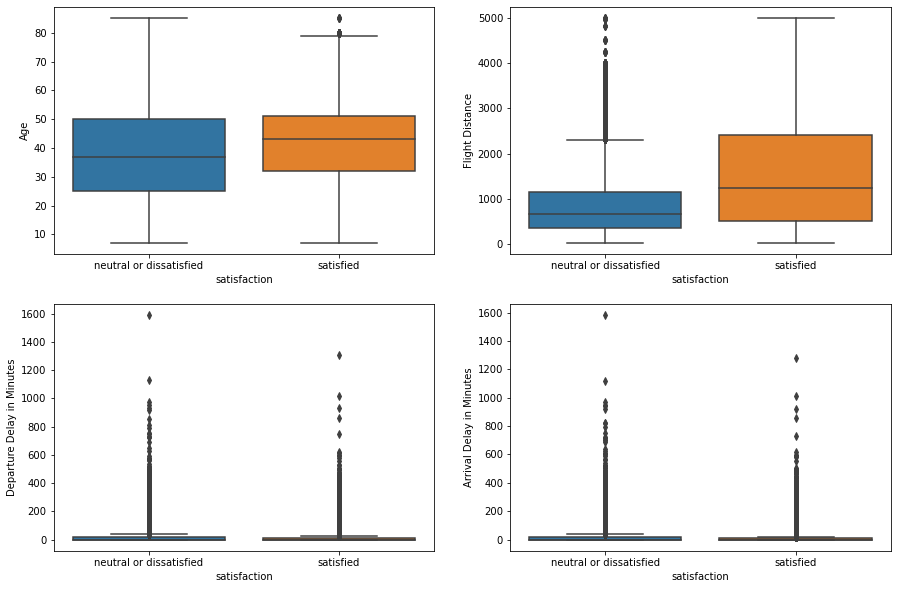

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x="satisfaction", y='Age', data=df_passengers, ax=axes[0][0])
sns.boxplot(x="satisfaction", y='Flight Distance', data=df_passengers, ax=axes[0][1])
sns.boxplot(x="satisfaction", y='Departure Delay in Minutes', data=df_passengers, ax=axes[1][0])
sns.boxplot(x="satisfaction", y='Arrival Delay in Minutes', data=df_passengers, ax=axes[1][1])
plt.show()

Vemos que variables como Age y Satisfaction parecen comportarse de forma distinta cuando hay o no satisfacción. Las variables del delay también parecen influir en la satisfacción del pasajero.

De la gráfica anterior vemos que las variables con nuevo y viejo balance tanto en origen como en destino tienen muy alta correlación, y que amount está relacionado monolíticamente con el balance destino.

### Variables categóricas

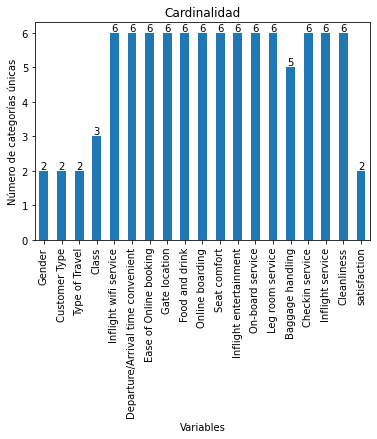

In [16]:
# Cardinalidad
ax = df_passengers_cat.nunique().plot.bar()
plt.ylabel('Número de categorías únicas')
plt.xlabel('Variables')
plt.title('Cardinalidad')
ax.bar_label(ax.containers[0])
plt.show()

La cardinalidad de las variables no es tan alta en ninguna de las columnas. Tenemos un máximo de 6 categorías por variable, por lo que podríamos aplicar OHE sin aumentar demasiado la cantidad de columnas

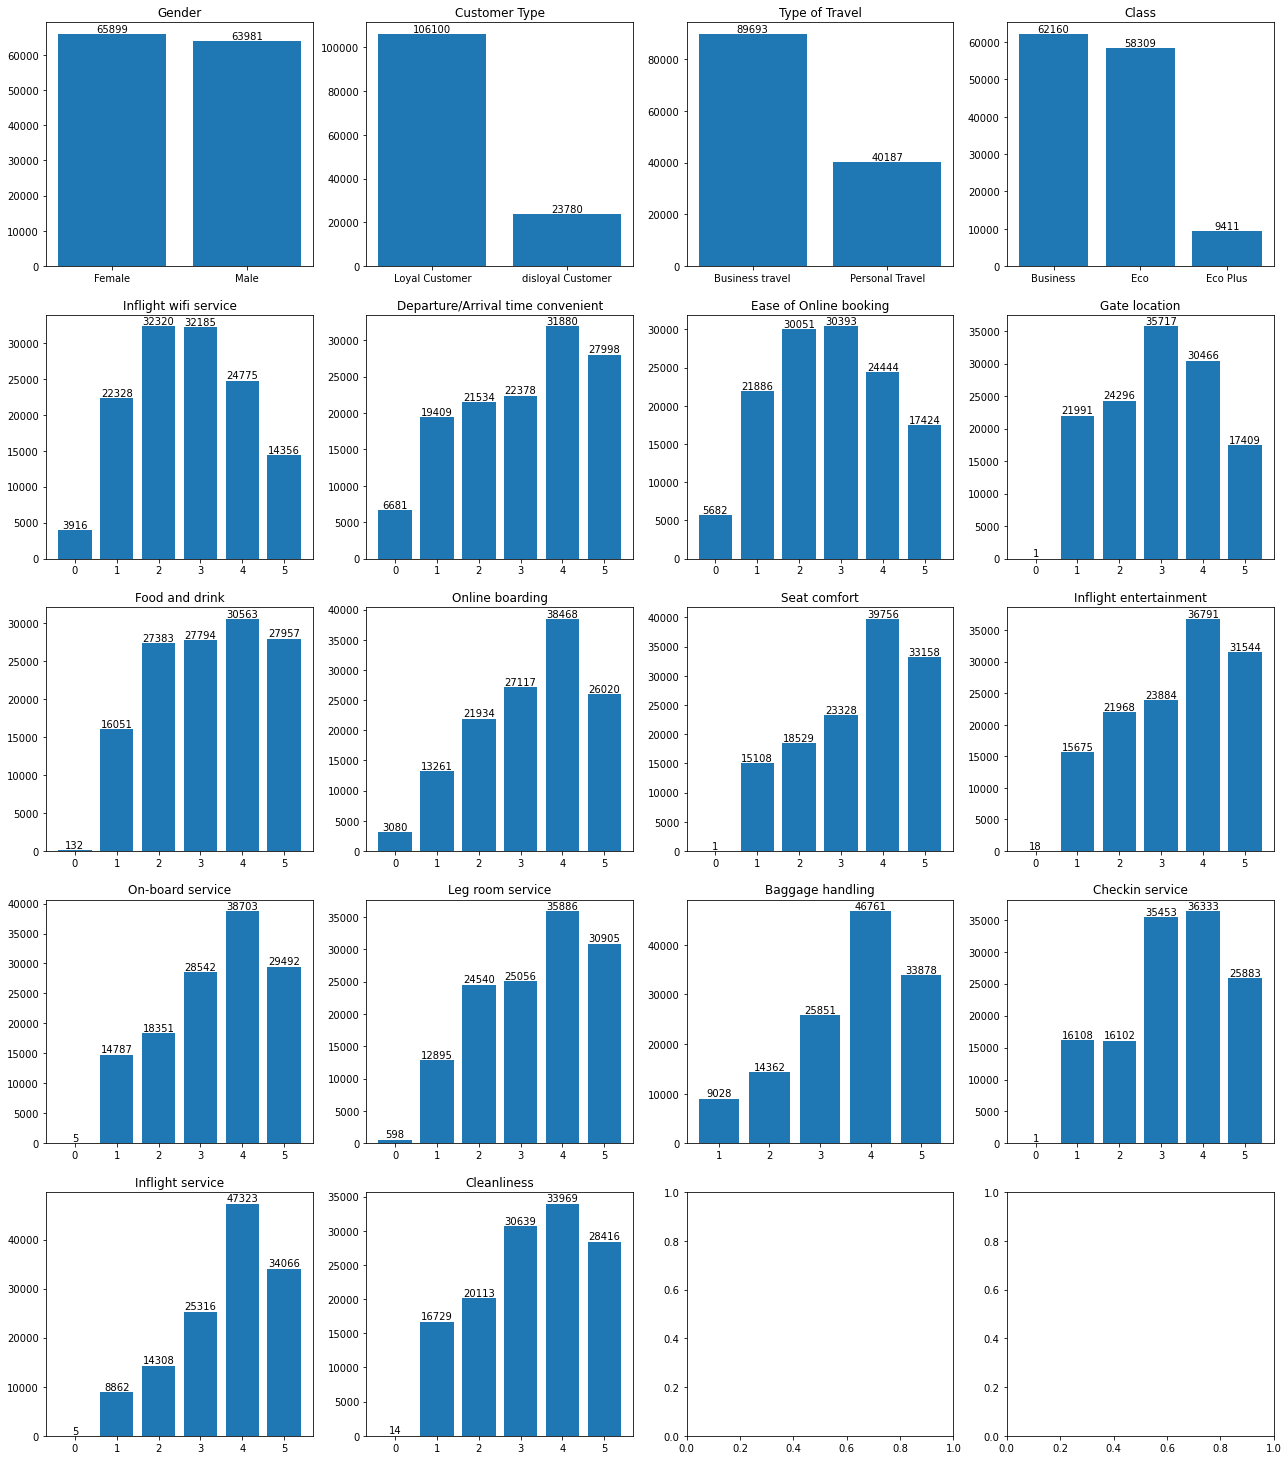

In [62]:
# Miramos la representatividad de los valores en las variables categóricas
rows = 5
cols = 4
fig, axes = plt.subplots(rows, cols, figsize = (22, 26))
for i, col in enumerate(df_passengers_cat.drop(columns = ['satisfaction'])):
    column_values = df_passengers_cat[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//cols, i%cols].bar(labels, sizes)
    axes[i//cols, i%cols].set_title(col)
    axes[i//cols, i%cols].bar_label(axes[i//cols, i%cols].containers[0])
plt.show()

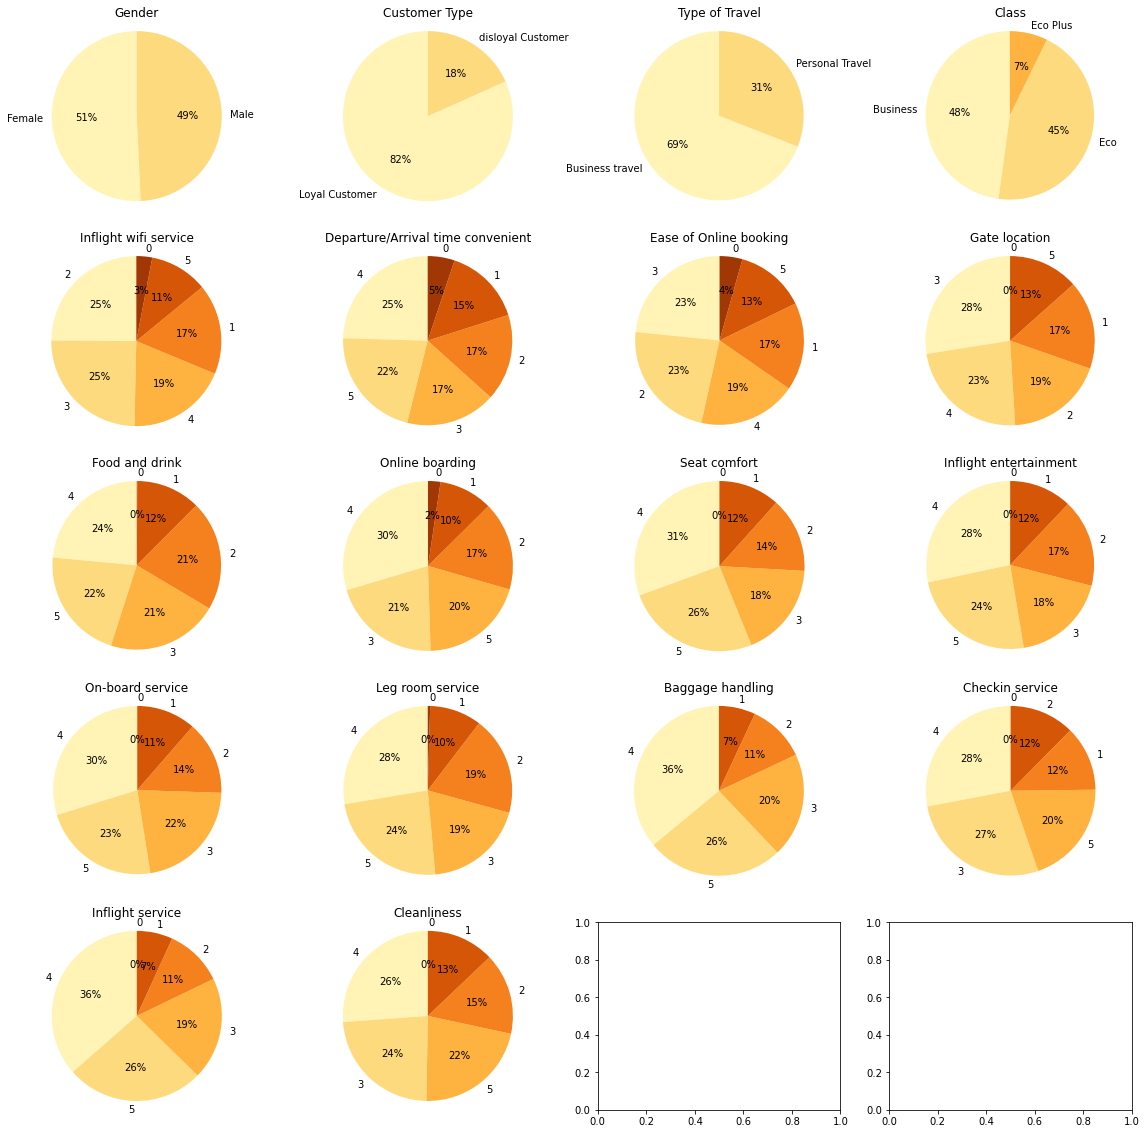

In [63]:
fig, axes = plt.subplots(rows, cols, figsize = (20, 20))
for i, col in enumerate(df_passengers_cat.drop(columns = ['satisfaction'])):
    column_values = df_passengers_cat[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//cols, i%cols].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//cols, i%cols].axis('equal')
    axes[i//cols, i%cols].set_title(col)
plt.show()

De aquí podemos ver una serie de cosas:

- La proporción entre pasajeros hombres y mujeres es similar, siendo ligeramente mayor en mujeres. 
- La mayoría de clientes dentro del dataset son frecuentes y viajan por motivos de negocios.
- Los servicios de entretenimiento, confort y los servicios dentro del avión parecen ser buenos, ya que más del 50% los califican entre 4 y 5. 

#### Variable de salida

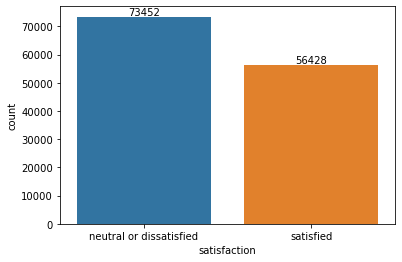

In [64]:
ax = sns.countplot(data = df_passengers, x = 'satisfaction')
ax.bar_label(ax.containers[0])
plt.show()

In [67]:
df_passengers['satisfaction'].value_counts() / df_passengers.shape[0]

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

Hay un ligero desbalance entre las clases, por lo que se podría pensar en alguna técnica de balanceo de datos para hacer más justa la clasificación. Además, podemos codificar esta variable siendo 1 = satisfecho, 0 = neutral o insatisfecho. 

In [68]:
# Mapeo de variable independiente de categórica a binaria
df_passengers['satisfaction'] = df_passengers['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied' : 0})

### Train/test split

In [426]:
y = df_passengers['satisfaction']
X = df_passengers.drop(['satisfaction'], axis=1)

#  Asignamos stratify = y para mantener el balance entre las clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [239]:
#Validamos si el desbalance se mantiene entre el test y el train

(y_train == 1).sum() / y_train.shape[0], (y_test == 1).sum() / y_test.shape[0]

(0.43445873113643363, 0.4344779796735448)

### Limpieza de datos

In [240]:
# Cantidad de datos faltantes por variable
cantidad_nulos = X_train.isnull().sum().sort_values(ascending = False)
# Representatividad por variable de la data faltante
porcentaje_nulos = ((X_train.isnull().sum() / X_train.shape[0]) * 100).sort_values(ascending = False)

pd.concat([cantidad_nulos, porcentaje_nulos],\
          axis=1).rename(columns={0 : 'Cantidad nulos', 1 : 'Porcentaje nulos'})

,Cantidad nulos,Porcentaje nulos
Arrival Delay in Minutes,329,0.316638
Age,0,0.000000
Food and drink,0,0.000000
Inflight service,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000
Inflight entertainment,0,0.000000
Seat comfort,0,0.000000


La única variable con nulos es Arrival Delay in Minutes. Dado que el porcentaje de nulos de esa variable comparado con el total de datos en el dataset es de solo el 0.32%, por lo que emplearé la técnica de imputación por mediana. 

In [241]:
X_train['Arrival Delay in Minutes'].fillna(X_train['Arrival Delay in Minutes'].median(), inplace = True)

In [242]:
X_train['Arrival Delay in Minutes'].isna().sum()

0

#### Transformación de variables

In [243]:
# Separamos variables categóricas de numéricas
df_num = X_train.select_dtypes(include='number')
df_cat = X_train.select_dtypes(include='category')

In [245]:
# Dividimos las categóricas booleanas, de las que no

binary_columns = [c for c in df_cat.columns if df_cat[c].nunique() == 2]
nonbinary_columns = [c for c in df_cat.columns if df_cat[c].nunique() > 2]

In [246]:
for i in binary_columns:
    print(i, df_cat[i].unique())

Gender ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
Customer Type ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
Type of Travel ['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']


In [247]:
df_cat['Gender'] = df_cat['Gender'].map({'Male': 1, 'Female' : 0})
df_cat['Customer Type'] = df_cat['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer' : 0})
df_cat['Type of Travel'] = df_cat['Type of Travel'].map({'Business travel': 1, 'Personal Travel' : 0})

In [248]:
df_cat[binary_columns]

,Gender,Customer Type,Type of Travel
56347,1,1,1
103345,1,1,0
75976,0,1,1
121763,1,0,1
107028,0,1,0
...,...,...,...
10445,0,1,0
115973,0,1,1
46932,0,1,1
15659,0,1,0


Para las otras variables, aplicamos OHE. 

In [249]:
data_nonbinary = pd.get_dummies(df_cat[nonbinary_columns])
data_nonbinary.columns

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

Ahora, normalizamos las variables numéricas empleando standard scaler

In [250]:
# Normalizamos las variables numéricas. 

scaler = StandardScaler()

df_num = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)

# Creamos el dataset de train

X_train = pd.concat((df_num, df_cat[binary_columns].reset_index(drop = True), data_nonbinary.reset_index(drop = True)), axis = 1)

In [251]:
# Creamos el dataset de train

X_train = pd.concat((df_num, df_cat[binary_columns].reset_index(drop = True), data_nonbinary.reset_index(drop = True)), axis = 1)

### Selección de features

Dada la alta cantidad de columnas agregadas tras aplicar OHE, emplearé una técnica de selección de features basada en correlaciones y otra basada en el desempeño según un modelo tipo boosting, utilizando la librería de feature_engine. 

In [195]:
# Feature selection
from feature_engine.selection import (
    SmartCorrelatedSelection,
    SelectBySingleFeaturePerformance
)

In [209]:
smart_corr = SmartCorrelatedSelection(
    variables = None, # examines all variables
    method = "pearson", 
    threshold = 0.8, # the correlation coefficient threshold
    missing_values = "ignore",
    selection_method = "model_performance", 
    estimator = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state=1, class_weight = "balanced"), # the model from which to derive the importance
)

In [210]:
smart_corr.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(class_weight='balanced',
                                                          max_depth=5,
                                                          random_state=1),
                         selection_method='model_performance')

In [211]:
drop_by_correlations = smart_corr.features_to_drop_
drop_by_correlations 

['Departure Delay in Minutes',
 'Class_Eco',
 'Inflight service_0',
 'Cleanliness_0']

In [202]:
sel = SelectBySingleFeaturePerformance(
    estimator = LGBMClassifier(class_weight = "balanced", max_depth = 5, random_state=1), # the model, # the model
    scoring="balanced_accuracy", # the metric to determine model performance
    cv=3, # the cross-validation fold,
    threshold=None, # the performance threshold
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=LGBMClassifier(class_weight='balanced',
                                                          max_depth=5,
                                                          random_state=1),
                                 scoring='balanced_accuracy')

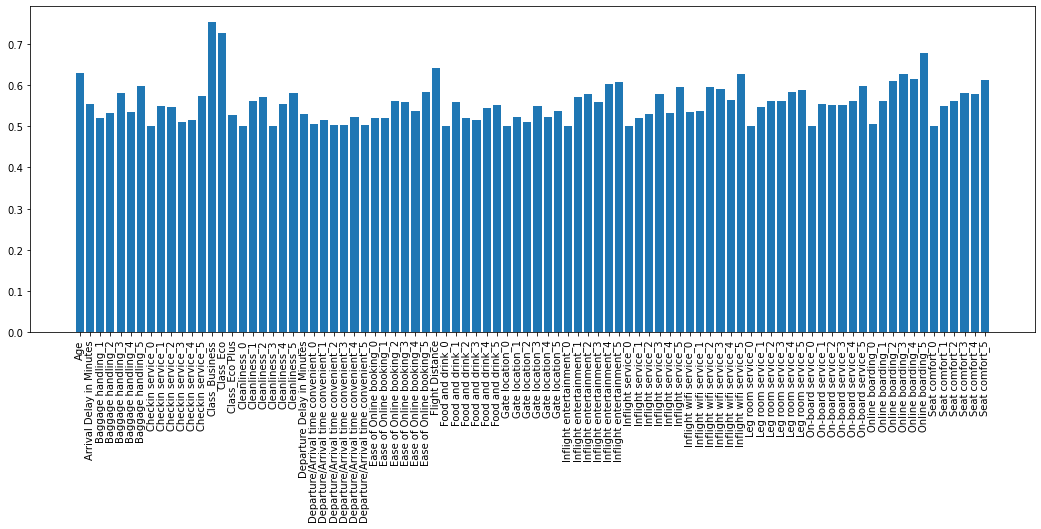

In [203]:
fig, axes = plt.subplots(figsize=(18,6))
plt.bar(*zip(*sorted(sel.feature_performance_.items()))) 
plt.xticks(rotation=90)
plt.show()

In [206]:
drop_by_performance = sel.features_to_drop_
drop_by_performance

['Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Class_Eco Plus',
 'Inflight wifi service_0',
 'Inflight wifi service_1',
 'Departure/Arrival time convenient_0',
 'Departure/Arrival time convenient_1',
 'Departure/Arrival time convenient_2',
 'Departure/Arrival time convenient_3',
 'Departure/Arrival time convenient_4',
 'Departure/Arrival time convenient_5',
 'Ease of Online booking_0',
 'Ease of Online booking_1',
 'Ease of Online booking_4',
 'Gate location_0',
 'Gate location_1',
 'Gate location_2',
 'Gate location_3',
 'Gate location_4',
 'Gate location_5',
 'Food and drink_0',
 'Food and drink_2',
 'Food and drink_3',
 'Food and drink_4',
 'Food and drink_5',
 'Online boarding_0',
 'Seat comfort_0',
 'Seat comfort_1',
 'Inflight entertainment_0',
 'On-board service_0',
 'On-board service_1',
 'On-board service_2',
 'On-board service_3',
 'Leg room service_0',
 'Leg room service_1',
 'Baggage handling_1',
 'Baggage handling_2',
 'Baggage handling_4',
 'Checkin service

Los resultados del feature selection por performance son mucho más severos, comparados con los de por correlaciones. Para evluar los desempeños, emplearé 3 enfoques distintos a la hora de entrenar modelos. 

1) Sin eliminar variables
2) Eliminando las variables correlacionadas
3) Eliminando las variables correlacionadas y con bajo performance

#### Balanceo de clases

Debido al ligero desbalance en el dataset, se empleará una técnica de aumentación de datos sintética para tratar de equilibrar las clases en la variable objetivo. Para ello usaremos RandomOverSampler.

In [268]:
from imblearn.over_sampling import RandomOverSampler

### Aplicando smote para balancear la data

sm = RandomOverSampler(sampling_strategy='minority', random_state = 1) 
X_train, y_train = sm.fit_resample(X_train, y_train)

In [269]:
# Comprobamos resultados
y_train.value_counts()

0    58762
1    58762
Name: satisfaction, dtype: int64

### Modeling

#### 1) Modelos con todas las variables 

In [286]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3), SVC(gamma = 'auto'), 
               DecisionTreeClassifier(max_depth=10,  random_state = 1), RandomForestClassifier(max_depth = 5, n_estimators = 100),
               XGBClassifier(max_depth = 5, n_estimators = 100), LGBMClassifier(max_depth = 5, n_estimators = 100)
 ] 

results=[]

for model in models:
    pipeline = Pipeline(steps=[
        ( 'model' , model)
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
    scores = cross_val_score(pipeline, X_train.values, y_train.values, scoring = 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
    print("Finalizado modelo: {}".format(model))

Finalizado modelo: LogisticRegression()
Finalizado modelo: KNeighborsClassifier(n_neighbors=3)
Finalizado modelo: SVC(gamma='auto')
Finalizado modelo: DecisionTreeClassifier(max_depth=10, random_state=1)
Finalizado modelo: RandomForestClassifier(max_depth=5)
Finalizado modelo: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Finalizado modelo: LGBMClassifier(max_depth=5)


Text(0, 0.5, 'Accuracy')

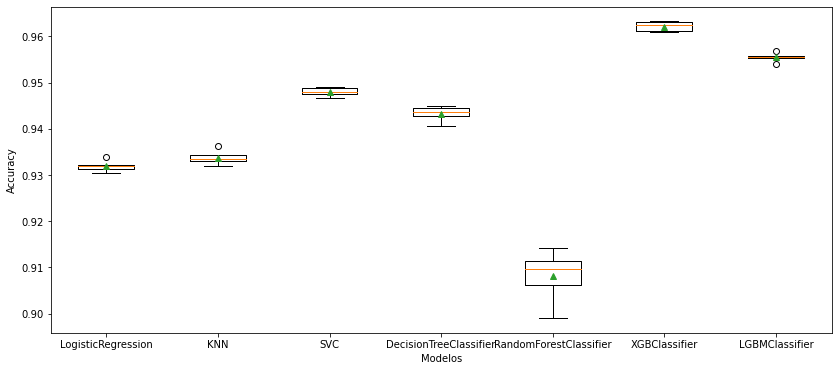

In [287]:
fig,axes = plt.subplots(1,figsize=(14,6))

labels = ['LogisticRegression', 'KNN', 'SVC',
         'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier', 'LGBMClassifier']

axes.boxplot(np.vstack((results)).T, labels = labels, showmeans=True)

axes.set_xlabel("Modelos")
axes.set_ylabel("Accuracy")

In [301]:
pd.DataFrame(np.vstack((results)).T, columns = labels) 

,LogisticRegression,KNN,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,LGBMClassifier
0,0.932100,0.933418,0.947415,0.943672,0.911508,0.962348,0.955201
1,0.932014,0.936226,0.948734,0.944863,0.914188,0.963199,0.956860
2,0.933886,0.934227,0.948990,0.942736,0.906275,0.961030,0.955797
3,0.930440,0.931844,0.947926,0.944437,0.899085,0.963157,0.955584
4,0.931246,0.932990,0.946647,0.940606,0.909632,0.960815,0.954093


Dado que los modelos tipo boosting tuvieron un accuracy mayor comparados con los demás modelos, las próximas pruebas se harán solo con estos modelos. 

#### 2) Modelos sin variables altamente correlacionadas

In [308]:
X_train_drop_corr = X_train.drop(columns = drop_by_correlations)

In [309]:
models = [XGBClassifier(max_depth = 5, n_estimators = 100), LGBMClassifier(max_depth = 5, n_estimators = 100)] 

results=[]

for model in models:
    pipeline = Pipeline(steps=[
        ( 'model' , model)
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
    scores = cross_val_score(pipeline, X_train_drop_corr.values, y_train.values, scoring = 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
    print("Finalizado modelo: {}".format(model))

Finalizado modelo: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Finalizado modelo: LGBMClassifier(max_depth=5)


Text(0, 0.5, 'Accuracy')

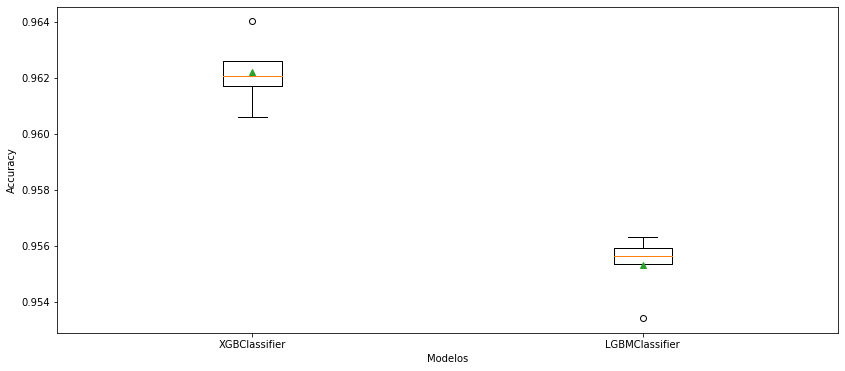

In [311]:
fig,axes = plt.subplots(1,figsize=(14,6))

labels = [ 'XGBClassifier', 'LGBMClassifier']

axes.boxplot(np.vstack((results)).T, labels = labels, showmeans=True)

axes.set_xlabel("Modelos")
axes.set_ylabel("Accuracy")

In [312]:
pd.DataFrame(np.vstack((results)).T, columns = labels) 

,XGBClassifier,LGBMClassifier
0,0.961710,0.955329
1,0.962051,0.956307
2,0.962604,0.955924
3,0.964008,0.955626
4,0.960602,0.953412


Observamos que sigue performando mejor el modelo tipo XGBoost, y que además, al eliminar esas 4 variables los resultados no difieren, comparado con el modelo considerando todas las variables. 

#### 3) Modelos sin variables altamente correlacionadas y sin variables que performaron mal

In [318]:
X_train_drop_corr_and_bad_vars = X_train.drop(columns =  set(drop_by_correlations + drop_by_performance))

In [319]:
models = [XGBClassifier(max_depth = 5, n_estimators = 100), LGBMClassifier(max_depth = 5, n_estimators = 100)] 

results=[]

for model in models:
    pipeline = Pipeline(steps=[
        ( 'model' , model)
    ])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=42)
    scores = cross_val_score(pipeline, X_train_drop_corr.values, y_train.values, scoring = 'accuracy' , cv=cv, n_jobs=-1)    
    results.append(scores)
    print("Finalizado modelo: {}".format(model))

Finalizado modelo: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Finalizado modelo: LGBMClassifier(max_depth=5)


Text(0, 0.5, 'Accuracy')

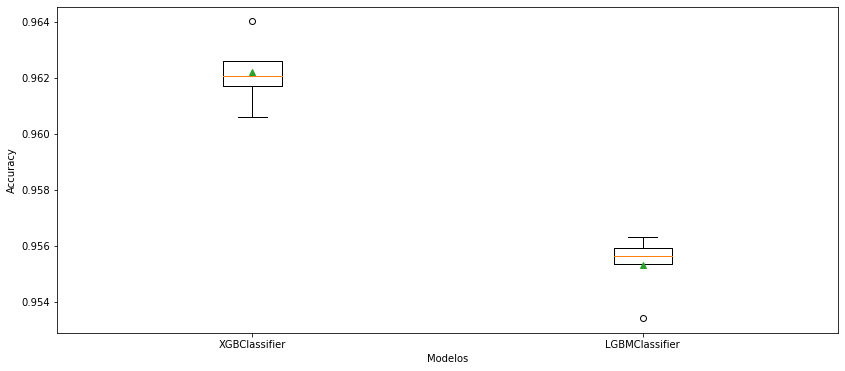

In [320]:
fig,axes = plt.subplots(1,figsize=(14,6))

labels = [ 'XGBClassifier', 'LGBMClassifier']

axes.boxplot(np.vstack((results)).T, labels = labels, showmeans=True)

axes.set_xlabel("Modelos")
axes.set_ylabel("Accuracy")

In [321]:
pd.DataFrame(np.vstack((results)).T, columns = labels) 

,XGBClassifier,LGBMClassifier
0,0.961710,0.955329
1,0.962051,0.956307
2,0.962604,0.955924
3,0.964008,0.955626
4,0.960602,0.953412


In [324]:
X_train_drop_corr_and_bad_vars.shape, X_train.shape

((117524, 42), (117524, 93))

Mismos resultados, pero con menos de la mitad de variables.  Seleccionamos entonces este enfoque debido a que al eliminar esas variables que no agregan valor, estamos optimizando nuestro modelo para que se entrene más rápido. Al final, seleccionamos como modelo ganador el XGBClassifier, por lo que procederemos a optimizar sus hiperparámetros.

#### Hyperopt tuning

In [363]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 10, 1),
        'learning_rate': hp.quniform ('learning_rate', 0.05, 0.3, 0.05),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.choice("n_estimators", [50, 100, 150, 200, 500]),
        'seed': 0
    }

In [364]:
def objective(space):

    xgb = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), 
                    min_child_weight=int(space['min_child_weight']), learning_rate = space['learning_rate'])
        
    xgb.fit(X_train_drop_corr_and_bad_vars.values, 
            y_train.values,
            eval_metric='logloss',
            verbose=0)

    accuracy = accuracy_score(y_train.values, xgb.predict(X_train_drop_corr_and_bad_vars.values))
                                
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [365]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

SCORE:                                                
0.9621864470235867                                    
SCORE:                                                                           
0.941986317688302                                                                
SCORE:                                                                           
0.9231731391035023                                                               
SCORE:                                                                           
0.9478064055001532                                                               
SCORE:                                                                           
0.9569704911337259                                                               
SCORE:                                                                           
0.9507164494060788                                                               
SCORE:                                                                

In [373]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'learning_rate': 0.15000000000000002, 'max_depth': 8.0, 'min_child_weight': 3.0, 'n_estimators': 4}


In [371]:
xgb_good = XGBClassifier(
                    n_estimators = 500, max_depth = int(best_hyperparams['max_depth']),
                    min_child_weight= best_hyperparams['min_child_weight'], 
                    learning_rate = best_hyperparams['learning_rate'],
                  )

In [372]:
xgb_good.fit(X_train_drop_corr_and_bad_vars.values, y_train, eval_metric="logloss",
        verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15000000000000002, max_delta_step=0, max_depth=8,
              min_child_weight=3.0, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [374]:
#print(f" Best parameters: {clf_good.best_params_}")
print(f" Accuracy train: {accuracy_score(y_train, xgb_good.predict(X_train_drop_corr_and_bad_vars.values))}")

 Accuracy train: 0.9886150913855893


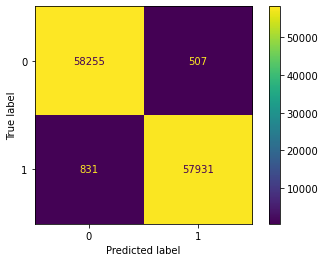

In [375]:
plot_confusion_matrix(xgb_good, X_train_drop_corr_and_bad_vars, y_train)

In [400]:
from sklearn.metrics import classification_report

print(classification_report(y_train, xgb_good.predict(X_train_drop_corr_and_bad_vars.values)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58762
           1       0.99      0.99      0.99     58762

    accuracy                           0.99    117524
   macro avg       0.99      0.99      0.99    117524
weighted avg       0.99      0.99      0.99    117524



#### SHAP Values (Feature importance)

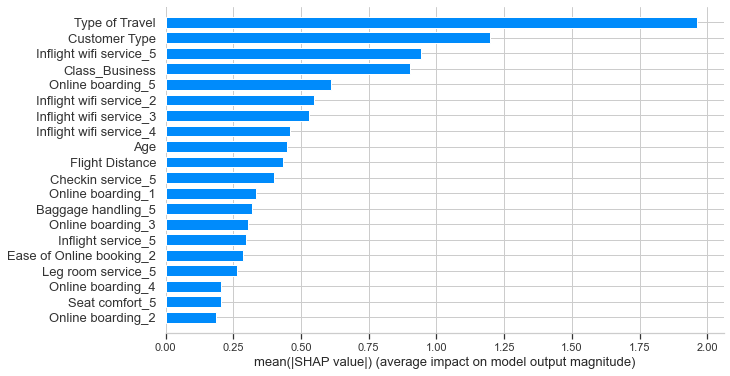

In [397]:
explainer = shap.TreeExplainer(xgb_good)
shap_values = explainer.shap_values(X_train_drop_corr_and_bad_vars.values)
shap.summary_plot(shap_values, X_train_drop_corr_and_bad_vars.values, plot_type = "bar", plot_size = (10,6),  
                    feature_names=X_train_drop_corr_and_bad_vars.columns)



### Evaluación de resultados

Antes que nada, hacemos el mismo tratamiento de datos que se hizo en el dataset de train, con el dataset de test.



In [427]:
# Imputamos valores nulos en test
X_test['Arrival Delay in Minutes'].fillna(X_test['Arrival Delay in Minutes'].median(), inplace = True)

In [429]:
# verificamos

X_test['Arrival Delay in Minutes'].isna().sum()

0

In [430]:
# Transformación de variables 

# Separamos variables categóricas de numéricas
df_num = X_test.select_dtypes(include='number')
df_cat = X_test.select_dtypes(include='category')

In [431]:
# Dividimos las categóricas booleanas, de las que no

binary_columns = [c for c in df_cat.columns if df_cat[c].nunique() == 2]
nonbinary_columns = [c for c in df_cat.columns if df_cat[c].nunique() > 2]

for i in binary_columns:
    print(i, df_cat[i].unique())



Gender ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
Customer Type ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']
Type of Travel ['Personal Travel', 'Business travel']
Categories (2, object): ['Personal Travel', 'Business travel']


In [432]:
df_cat['Gender'] = df_cat['Gender'].map({'Male': 1, 'Female' : 0})
df_cat['Customer Type'] = df_cat['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer' : 0})
df_cat['Type of Travel'] = df_cat['Type of Travel'].map({'Business travel': 1, 'Personal Travel' : 0})

df_cat[binary_columns]

,Gender,Customer Type,Type of Travel
126586,1,1,0
12418,1,1,1
128897,0,1,1
2429,0,1,0
43539,1,1,1
...,...,...,...
31144,1,1,1
113580,0,1,1
46451,1,1,0
118724,1,0,1


In [433]:
# OHE

data_nonbinary = pd.get_dummies(df_cat[nonbinary_columns])
data_nonbinary.columns

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [434]:
# Normalizamos las variables numéricas. 

scaler = StandardScaler()

df_num = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)


In [435]:
# Creamos el dataset de train

X_test = pd.concat((df_num, df_cat[binary_columns].reset_index(drop = True), data_nonbinary.reset_index(drop = True)), axis = 1)

In [436]:
X_test

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,0.630741,-0.800477,-0.384624,-0.389773,1,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1.095219,2.625235,-0.304173,-0.389773,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.161573,1.832060,-0.384624,-0.389773,0,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,-1.492587,-0.212122,0.151716,0.060407,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,-0.032799,-0.777385,2.002087,1.967056,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,-0.696339,2.154350,0.178533,0.272257,1,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
25972,1.758759,-0.929996,0.178533,-0.177924,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
25973,1.493343,-0.430999,1.626649,1.278544,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
25974,-1.028109,-0.683007,-0.384624,-0.389773,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [437]:
# Filtramos variables irrelevantes

X_test_limpia = X_test.drop(columns =  set(drop_by_correlations + drop_by_performance))

In [438]:
X_test_limpia

,Age,Flight Distance,Gender,Customer Type,Type of Travel,Class_Business,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,...,Leg room service_4,Leg room service_5,Baggage handling_3,Baggage handling_5,Checkin service_5,Inflight service_3,Inflight service_5,Cleanliness_1,Cleanliness_2,Cleanliness_5
0,0.630741,-0.800477,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.095219,2.625235,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.161573,1.832060,0,1,1,1,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,-1.492587,-0.212122,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.032799,-0.777385,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,-0.696339,2.154350,1,1,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
25972,1.758759,-0.929996,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25973,1.493343,-0.430999,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
25974,-1.028109,-0.683007,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [439]:
#print(f" Best parameters: {clf_good.best_params_}")
print(f" Accuracy train: {accuracy_score(y_test, xgb_good.predict(X_test_limpia.values))}")

 Accuracy train: 0.9503772713273791


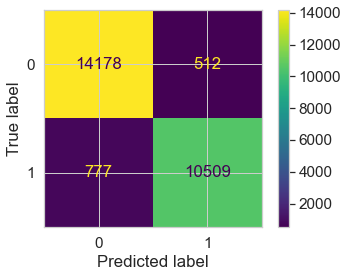

In [447]:
plot_confusion_matrix(xgb_good, X_test_limpia, y_test)

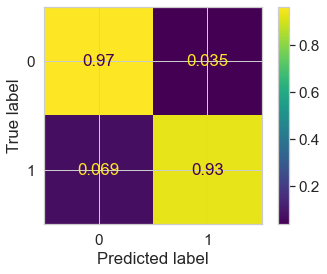

In [446]:
plot_confusion_matrix(xgb_good, X_test_limpia, y_test, normalize = "true")

In [443]:
print(classification_report(y_test, xgb_good.predict(X_test_limpia.values)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14690
           1       0.95      0.93      0.94     11286

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



El modelo performa bien tanto en entrenamiento como en test. Las métricas en test son ligeramente menores, pero logramos conseguir un 95% de accuracy y un f1-score muy similar. Lo cual es muy bueno para el negocio, ya que podrá enfocarse por ejemplo, en generar accionables sobre aquellas variables que tuvieron mayor impacto en el modelo y que pueden ser controladas, como lo son el servicio de WiFi, el online boarding, el checkin online, entre otros. 